# Dragon Real Estate - Price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282669,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705033,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.195000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt

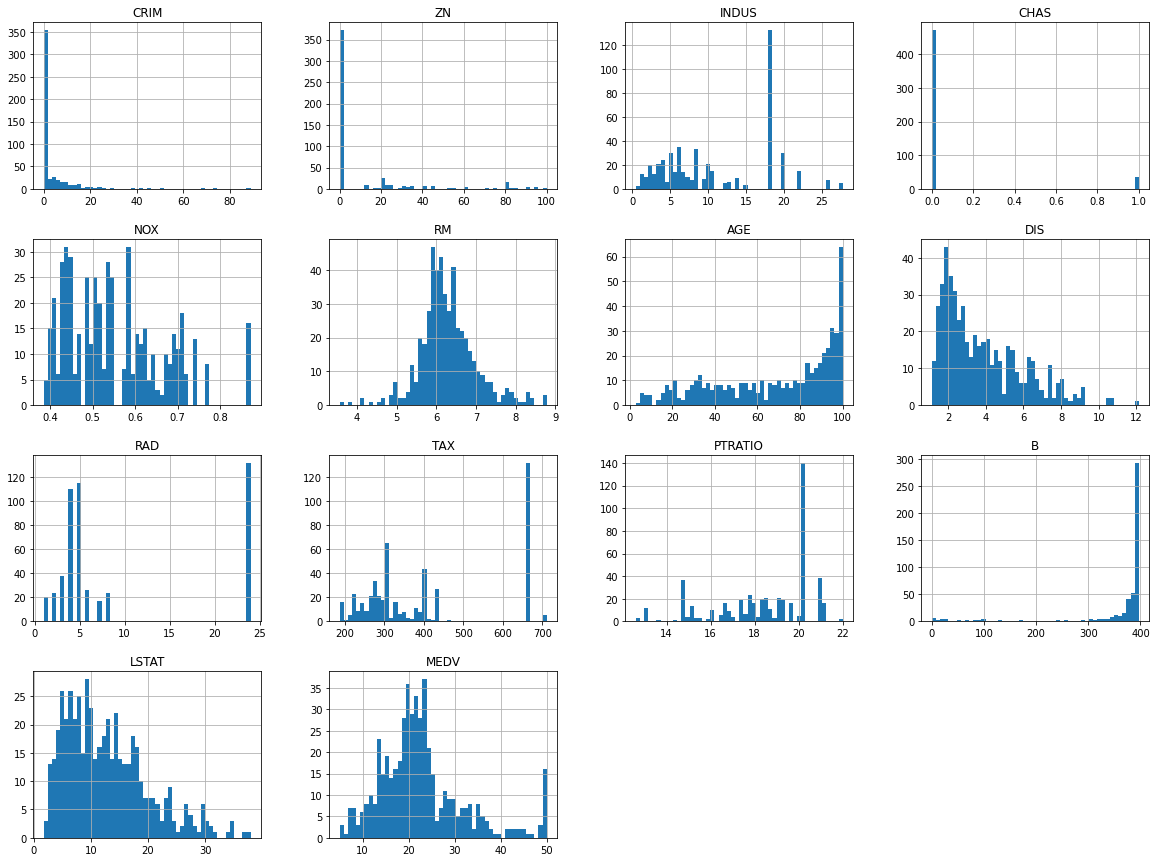

In [8]:
housing.hist(bins = 50, figsize=(20,15))
plt.show()

## train test spliting

In [9]:
import  numpy as np
def  split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    



In [10]:
train_set, test_set = split_train_test(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [11]:
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:405
Rows in test set:101



In [12]:
from  sklearn.model_selection import  train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:404
Rows in test set:102



## to split proper data into test and train  using straitified

In [13]:
from sklearn.model_selection import  StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for  train_index,test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
#if we have big data frame than before corr we have to take copy after spilitting
housing=strat_train_set.copy()

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending = False)
# value 1 means strong +ve corelation

MEDV       1.000000
RM         0.679360
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

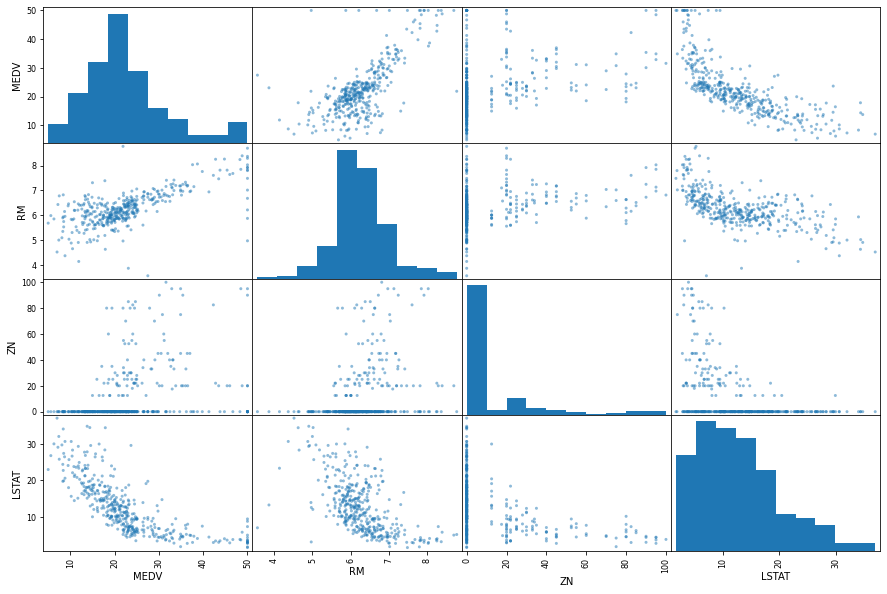

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN','LSTAT']
scatter_matrix(housing[attributes], figsize=(15,10))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

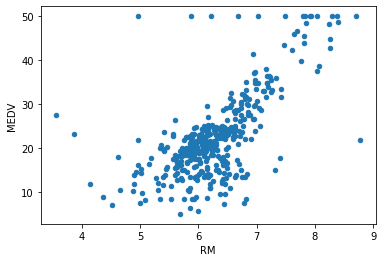

In [20]:
housing.plot(kind='scatter', x='RM', y='MEDV')

## Trying out Attributes combination

In [21]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

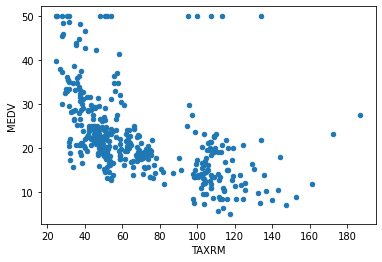

In [23]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV')

In [24]:
#selecting dependent and independent variables
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## missing attributes

In [25]:
# to take care of missing value we have 3 ways:
#     a) get ride of missing data points
#     b) get ride of whole attributes
#     c) set the value with some values(0, mean, median or mode)

In [26]:
housing.shape

(404, 13)

In [27]:
a=housing.dropna(subset=['RM'])  #droping null values
a.shape

(400, 13)

In [28]:
#we can drrop whole column only 
a=housing.drop('RM', axis=1)
print(a)


        CRIM    ZN  INDUS  CHAS    NOX   AGE     DIS  RAD  TAX  PTRATIO  \
254  0.04819  80.0   3.64     0  0.392  32.0  9.2203    1  315     16.4   
348  0.01501  80.0   2.01     0  0.435  29.7  8.3440    4  280     17.0   
476  4.87141   0.0  18.10     0  0.614  93.6  2.3053   24  666     20.2   
321  0.18159   0.0   7.38     0  0.493  54.3  4.5404    5  287     19.6   
326  0.30347   0.0   7.38     0  0.493  28.9  5.4159    5  287     19.6   
..       ...   ...    ...   ...    ...   ...     ...  ...  ...      ...   
155  3.53501   0.0  19.58     1  0.871  82.6  1.7455    5  403     14.7   
423  7.05042   0.0  18.10     0  0.614  85.1  2.0218   24  666     20.2   
98   0.08187   0.0   2.89     0  0.445  36.9  3.4952    2  276     18.0   
455  4.75237   0.0  18.10     0  0.713  86.5  2.4358   24  666     20.2   
216  0.04560   0.0  13.89     1  0.550  56.0  3.1121    5  276     16.4   

          B  LSTAT  
254  392.89   6.57  
348  390.94   5.99  
476  396.21  18.68  
321  396.90   6

In [29]:
median=housing['RM'].median()

In [30]:
 housing['RM'].fillna(median)  #filling data with median

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.shape

(404, 13)

In [32]:
housing.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
155  3.53501   0.0  19.58     1  0.871  6.152  82.6  1.7455    5  403   
423  7.05042   0.0  18.10     0  0.614  6.103  85.1  2.0218   24  666   
98   0.08187   0.0   2.89     0  0.445  7.820  36.9  3.4952    2  276   
455  4.75237   0.0  18.10     0  0.713  6.525  86.5  2.4358   24  666   
216  0.04560   0.0  13.89     1  0.550  5.888  56.0  3.1121    5  276   

     PTRATIO       B  LSTAT  
254     16.4  392.89   6.57  
348     17.0  390.94   5.99  

In [33]:
# we can replace median/mean with the help of skelearn also
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20850e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
x= imputer.transform(housing)

In [36]:
 housing_tr=pd.DataFrame(x, columns = housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276631,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711662,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.208500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit learn Design

In [38]:
# Primarily 3 types of object
# 1) Estimators: 
#     a) estimates some parameters based on dataset. ex-imputer
#     b) it has fit and transform method
#     c) Fits the dataset and calculates internal parameters
    
# 2) Transformers
# a) transform  method takes input and return o/p based on learning from  fit()
# b) it also contain fit_transform() which fit and then transforms


# 3) predictors
# a) Ex- Linear Regression 
# b) fit() and transform() method and it also contain score()

## Feature Scaling

In [39]:
# There are two type of scalling methods are available 
# 1) Min-max scaling (Normalization)
# formula: (value-min)/(max-min)
#     Sklearn  provides  a class  called  minmaxScaler for this
# 2) Standarization 
# formula: (value-mean)/std
#     Sklearn provides  a class  called  StandardScaler  for this

## Creating Pipeline


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), 
                        #we can add many pipeline
                        ('stan_scaler', StandardScaler())])

In [41]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [42]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [43]:
housing_num_tr.shape

(404, 13)

## Selecting desired model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model = DecisionTreeRegressor()
#model = LinearRegression()
model.fit(housing_num_tr,housing_labels)  

RandomForestRegressor()

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_lables = housing_labels.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([22.623, 25.483, 16.246, 23.436, 23.533])

In [49]:
list(some_lables)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluting the model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [51]:
rmse

1.174753196114902

## Using better  evaluation  technique - cross validation

In [52]:
from sklearn.model_selection import  cross_val_score
scores = cross_val_score(model,  housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores

array([2.85352431, 2.72805601, 4.37491153, 2.71362954, 3.27568684,
       2.63513955, 4.72042005, 3.60938146, 3.38520691, 3.24902054])

In [54]:
def print_scores(scores):
    print("Scores:" , scores)
    print("mean:" ,scores.mean())
    print("standard dev :", scores.std())

In [55]:
print_scores(rmse_scores)

Scores: [2.85352431 2.72805601 4.37491153 2.71362954 3.27568684 2.63513955
 4.72042005 3.60938146 3.38520691 3.24902054]
mean: 3.354497672872597
standard dev : 0.6754128577574086


## to save our model we will use joblib

In [56]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model

In [57]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set['MEDV'].copy()
x_test_prepared = my_pipeline.transform(X_test)
final_pred = model.predict(x_test_prepared)
final_mse = mean_squared_error(Y_test, final_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

2.836079754264505

In [ ]:
print()